# Table of Contents
* Exploratory Data Analysis
* Data Preprocessing
* Baseline Model Performance
* Hyperparameter Tuning
* Model Results & Interpretation

## Exploratory Data Analysis


In [2]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss
import itertools
import os

#show all output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
import scipy.stats as stats
from scipy.stats import norm
from scipy.special import boxcox1p

import statsmodels
import statsmodels.api as sm

from sklearn.preprocessing import scale, StandardScaler, RobustScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, StratifiedKFold, RandomizedSearchCV
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, LinearRegression, ElasticNet,  HuberRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.kernel_ridge import KernelRidge
from sklearn.utils import resample

from xgboost import XGBRegressor

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


### Loading the data

In [4]:
df = pd.read_csv('data/raw/AB_NYC_2019.csv')
df

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48890,36484665,Charming one bedroom - newly renovated rowhouse,8232441,Sabrina,Brooklyn,Bedford-Stuyvesant,40.67853,-73.94995,Private room,70,2,0,NaN,NaN,2,9
48891,36485057,Affordable room in Bushwick/East Williamsburg,6570630,Marisol,Brooklyn,Bushwick,40.70184,-73.93317,Private room,40,4,0,NaN,NaN,2,36
48892,36485431,Sunny Studio at Historical Neighborhood,23492952,Ilgar & Aysel,Manhattan,Harlem,40.81475,-73.94867,Entire home/apt,115,10,0,NaN,NaN,1,27
48893,36485609,43rd St. Time Square-cozy single bed,30985759,Taz,Manhattan,Hell's Kitchen,40.75751,-73.99112,Shared room,55,1,0,NaN,NaN,6,2


In [5]:
df.shape
df.describe()
df.info()
df.dtypes

(48895, 16)

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [6]:
# check null values
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [7]:
# Check duplicates and drop duplicates if any
df.duplicated().sum()
df.drop_duplicates(inplace=True)

0

### Minor data cleanup

In [8]:
# Drop unused or quantitatively insignificant columns
df.drop(['name','id','host_name','last_review'], axis=1, inplace=True)
df.dtypes

host_id                             int64
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [9]:
df.head()
df.shape

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365
1,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355
2,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,1,365
3,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194
4,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0


(48895, 12)

### Visualisations

In [11]:
# List of top hosts_id
top_host=df.host_id.value_counts().head(10)
top_host

219517861    327
107434423    232
30283594     121
137358866    103
16098958      96
12243051      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

##### Distribution of object columns

In [40]:
df['neighbourhood_group'].unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

Text(0.5, 1.0, 'Neighbourhood Group')

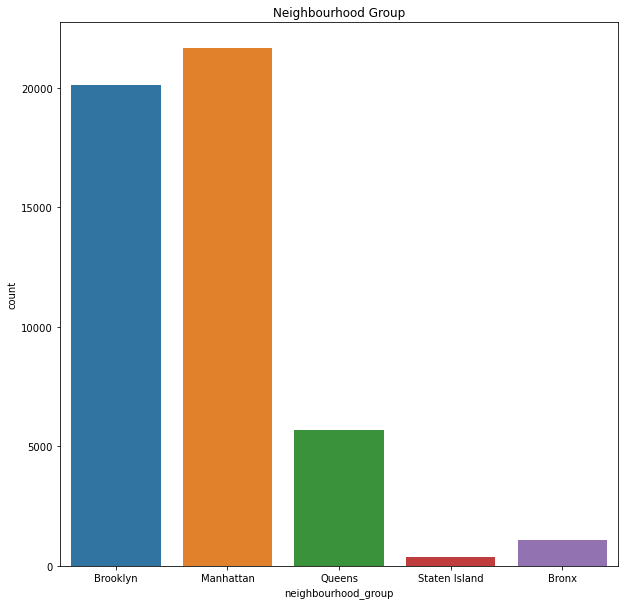

In [42]:
# neighbourhood_group
sns.countplot(df['neighbourhood_group'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Neighbourhood Group')

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='neighbourhood', ylabel='count'>

Text(0.5, 1.0, 'Neighbourhood')

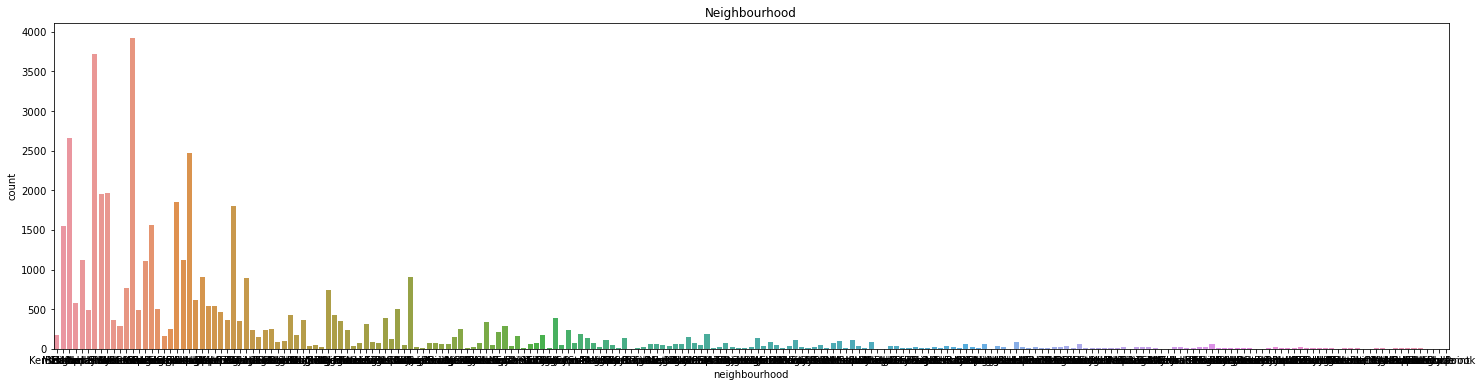

In [43]:
# neighbourhood
sns.countplot(df['neighbourhood'] )
fig = plt.gcf()
fig.set_size_inches(25,6)
plt.title('Neighbourhood')

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='room_type', ylabel='count'>

Text(0.5, 1.0, 'Room types Count')

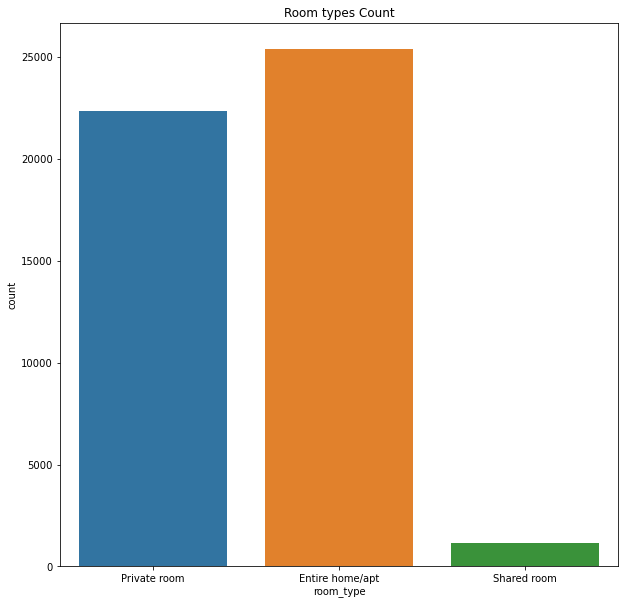

In [45]:
#Restaurants delivering Online or not
sns.countplot(df['room_type'])
fig = plt.gcf()
fig.set_size_inches(10,10)
plt.title('Room types Count')

<AxesSubplot:>

Text(0.5, 1.0, 'neighbourhood_group')

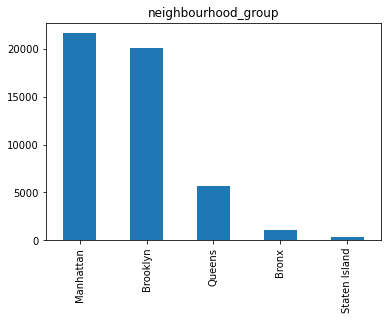

<AxesSubplot:>

Text(0.5, 1.0, 'neighbourhood')

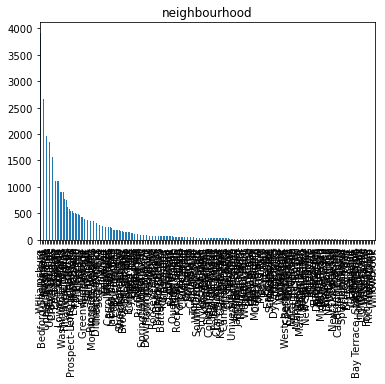

<AxesSubplot:>

Text(0.5, 1.0, 'room_type')

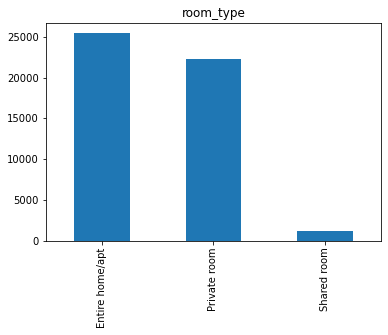

In [22]:
  for i in range(df.shape[1]):
    if df[df.columns[i]].dtype =='O' :
        x=df.columns[i]
        df[x].value_counts().plot(kind='bar')
        plt.title(x)
        plt.show()

##### Distribution Integer columns

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='host_id', ylabel='Density'>

Text(0.5, 1.0, 'host_id')

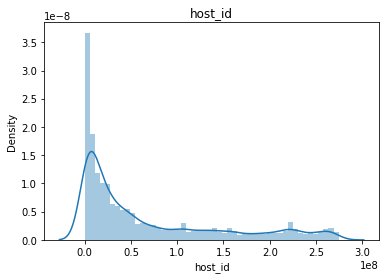

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

Text(0.5, 1.0, 'price')

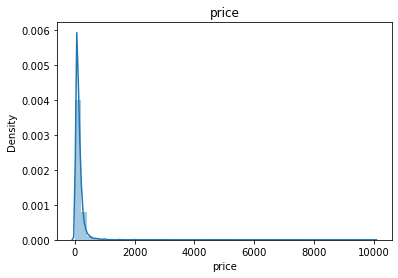

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='minimum_nights', ylabel='Density'>

Text(0.5, 1.0, 'minimum_nights')

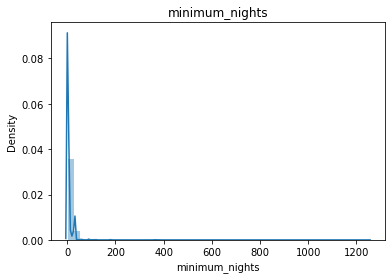

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='number_of_reviews', ylabel='Density'>

Text(0.5, 1.0, 'number_of_reviews')

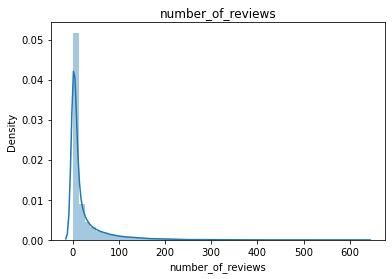

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='calculated_host_listings_count', ylabel='Density'>

Text(0.5, 1.0, 'calculated_host_listings_count')

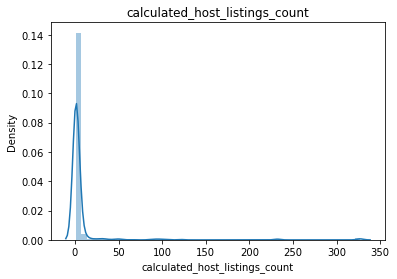

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='availability_365', ylabel='Density'>

Text(0.5, 1.0, 'availability_365')

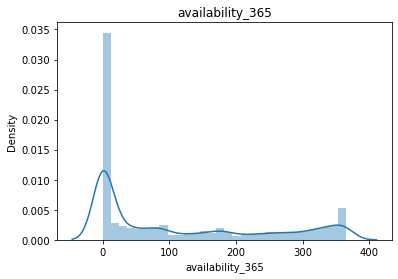

In [20]:
# Distribution of each int64 columns data point

for i in range(df.shape[1]):
    
    if df[df.columns[i]].dtype =='int64' :

        z = df.columns[i]
        sns.distplot(df[z])
        plt.title(z)
        plt.show()

##### Distribution of float columns

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='latitude', ylabel='Density'>

Text(0.5, 1.0, 'latitude')

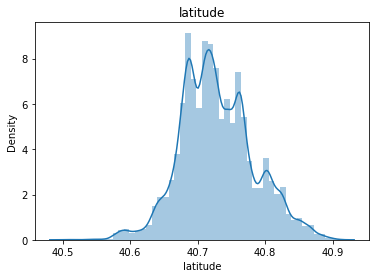

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='longitude', ylabel='Density'>

Text(0.5, 1.0, 'longitude')

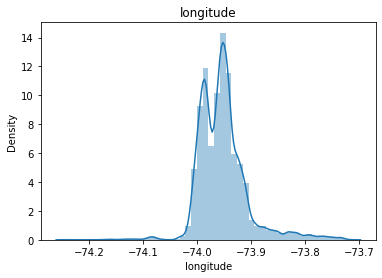

C:\Users\rodzi\Anaconda3\envs\dyson\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='reviews_per_month', ylabel='Density'>

Text(0.5, 1.0, 'reviews_per_month')

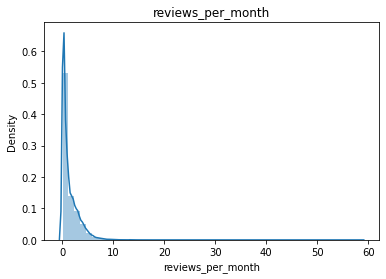

In [36]:
for i in range(df.shape[1]):
    
    if df[df.columns[i]].dtype =='float64' :

        z = df.columns[i]
        sns.distplot(df[z])
        plt.title(z)
        plt.show()

<Figure size 1080x1080 with 0 Axes>

(array([16479.,  6889.,  4062.,  3405.,  1914.,  1600.,  1164.,  1478.,
         1010.,  1122.,  1046.,  1180.,   666.,   745.,   892.,   851.,
         1536.,   765.,   925.,  1166.]),
 array([2.43800000e+03, 1.37183818e+07, 2.74343255e+07, 4.11502692e+07,
        5.48662130e+07, 6.85821568e+07, 8.22981005e+07, 9.60140442e+07,
        1.09729988e+08, 1.23445932e+08, 1.37161876e+08, 1.50877819e+08,
        1.64593763e+08, 1.78309707e+08, 1.92025650e+08, 2.05741594e+08,
        2.19457538e+08, 2.33173482e+08, 2.46889426e+08, 2.60605369e+08,
        2.74321313e+08]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'host_id')

(array([7.000e+00, 1.000e+01, 2.200e+01, 1.500e+02, 4.080e+02, 4.170e+02,
        1.245e+03, 2.223e+03, 5.740e+03, 7.155e+03, 8.581e+03, 6.187e+03,
        6.447e+03, 3.142e+03, 2.969e+03, 2.213e+03, 9.830e+02, 7.270e+02,
        2.120e+02, 5.700e+01]),
 array([40.49979  , 40.5204535, 40.541117 , 40.5617805, 40.582444 ,
        40.6031075, 40.623771 , 40.6444345, 40.665098 , 40.6857615,
        40.706425 , 40.7270885, 40.747752 , 40.7684155, 40.789079 ,
        40.8097425, 40.830406 , 40.8510695, 40.871733 , 40.8923965,
        40.91306  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'latitude')

(array([7.0000e+00, 6.0000e+00, 1.6000e+01, 3.3000e+01, 6.2000e+01,
        1.0800e+02, 1.4100e+02, 3.6000e+01, 1.6280e+03, 1.2574e+04,
        1.2479e+04, 1.2672e+04, 5.1510e+03, 1.3070e+03, 8.6100e+02,
        6.1500e+02, 4.7900e+02, 3.5700e+02, 2.4400e+02, 1.1900e+02]),
 array([-74.24442  , -74.2178485, -74.191277 , -74.1647055, -74.138134 ,
        -74.1115625, -74.084991 , -74.0584195, -74.031848 , -74.0052765,
        -73.978705 , -73.9521335, -73.925562 , -73.8989905, -73.872419 ,
        -73.8458475, -73.819276 , -73.7927045, -73.766133 , -73.7395615,
        -73.71299  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'longitude')

(array([4.766e+04, 9.370e+02, 1.330e+02, 5.500e+01, 3.300e+01, 2.400e+01,
        1.000e+01, 8.000e+00, 7.000e+00, 2.000e+00, 8.000e+00, 0.000e+00,
        3.000e+00, 4.000e+00, 0.000e+00, 3.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 6.000e+00]),
 array([    0.,   500.,  1000.,  1500.,  2000.,  2500.,  3000.,  3500.,
         4000.,  4500.,  5000.,  5500.,  6000.,  6500.,  7000.,  7500.,
         8000.,  8500.,  9000.,  9500., 10000.]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'price')

(array([4.8566e+04, 1.9200e+02, 6.3000e+01, 1.3000e+01, 1.1000e+01,
        3.8000e+01, 1.0000e+00, 6.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        4.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e+00, 6.34500e+01, 1.25900e+02, 1.88350e+02, 2.50800e+02,
        3.13250e+02, 3.75700e+02, 4.38150e+02, 5.00600e+02, 5.63050e+02,
        6.25500e+02, 6.87950e+02, 7.50400e+02, 8.12850e+02, 8.75300e+02,
        9.37750e+02, 1.00020e+03, 1.06265e+03, 1.12510e+03, 1.18755e+03,
        1.25000e+03]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'minimum_nights')

(array([3.8782e+04, 4.5160e+03, 2.3200e+03, 1.2510e+03, 8.2300e+02,
        4.4300e+02, 3.2100e+02, 1.7800e+02, 9.5000e+01, 4.8000e+01,
        4.1000e+01, 2.6000e+01, 1.8000e+01, 1.3000e+01, 9.0000e+00,
        3.0000e+00, 1.0000e+00, 2.0000e+00, 3.0000e+00, 2.0000e+00]),
 array([  0.  ,  31.45,  62.9 ,  94.35, 125.8 , 157.25, 188.7 , 220.15,
        251.6 , 283.05, 314.5 , 345.95, 377.4 , 408.85, 440.3 , 471.75,
        503.2 , 534.65, 566.1 , 597.55, 629.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'number_of_reviews')

(array([3.2814e+04, 5.1640e+03, 6.9800e+02, 1.2700e+02, 2.9000e+01,
        6.0000e+00, 2.0000e+00, 1.0000e+00, 0.0000e+00, 1.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([1.00000e-02, 2.93450e+00, 5.85900e+00, 8.78350e+00, 1.17080e+01,
        1.46325e+01, 1.75570e+01, 2.04815e+01, 2.34060e+01, 2.63305e+01,
        2.92550e+01, 3.21795e+01, 3.51040e+01, 3.80285e+01, 4.09530e+01,
        4.38775e+01, 4.68020e+01, 4.97265e+01, 5.26510e+01, 5.55755e+01,
        5.85000e+01]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'reviews_per_month')

(array([46577.,   614.,   332.,   219.,     0.,   370.,   103.,   121.,
            0.,     0.,     0.,     0.,     0.,     0.,   232.,     0.,
            0.,     0.,     0.,   327.]),
 array([  1. ,  17.3,  33.6,  49.9,  66.2,  82.5,  98.8, 115.1, 131.4,
        147.7, 164. , 180.3, 196.6, 212.9, 229.2, 245.5, 261.8, 278.1,
        294.4, 310.7, 327. ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'calculated_host_listings_count')

(array([21390.,  2206.,  1705.,  1599.,  2396.,   849.,   843.,   864.,
         1190.,  1543.,   977.,   707.,   877.,  1043.,  1022.,  1068.,
         1209.,  1578.,  2133.,  3696.]),
 array([  0.  ,  18.25,  36.5 ,  54.75,  73.  ,  91.25, 109.5 , 127.75,
        146.  , 164.25, 182.5 , 200.75, 219.  , 237.25, 255.5 , 273.75,
        292.  , 310.25, 328.5 , 346.75, 365.  ]),
 <BarContainer object of 20 artists>)

Text(0.5, 1.0, 'availability_365')

<Figure size 1080x1080 with 0 Axes>

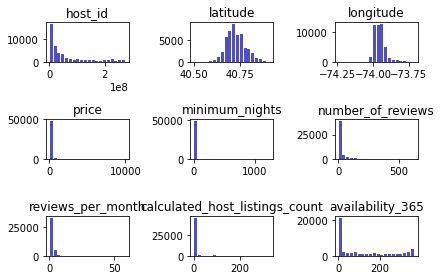

In [35]:
int_col = df.select_dtypes(include=['float64', 'int64'])

plt.figure(figsize=[15,15])
f,a = plt.subplots(3,3)
a = a.ravel()
for idx,ax in enumerate(a):
    ax.hist(int_col.iloc[:,idx], bins=20, color='#0504aa',alpha=0.7, rwidth=0.8)
    ax.set_title(int_col.columns[idx])
plt.tight_layout()

##### Correlation and relation between data

<Figure size 720x720 with 0 Axes>

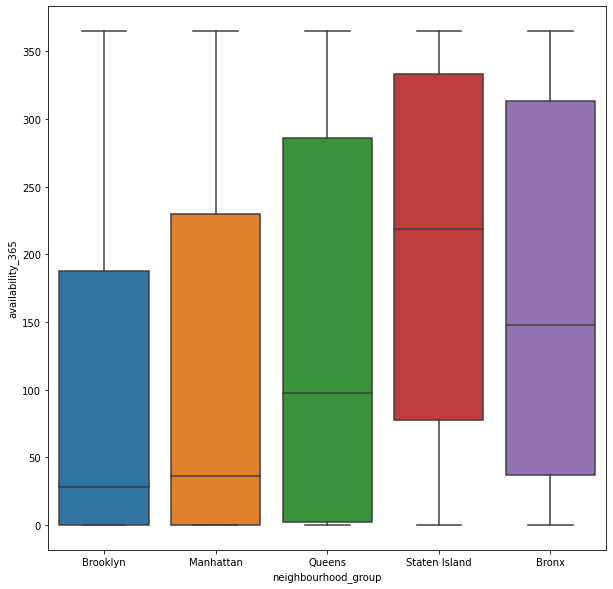

In [48]:
# Relationship between neighbourhood_group and availability_365
plt.figure(figsize=(10,10))
ax = sns.boxplot(data=df, x='neighbourhood_group',y='availability_365')